<a href="https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/Estimating_Psychometric_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Psychometric function (PF)

__Strongway (msense.de), Dec. 2021__

The psychometric function (PF) is about relation between human performance (e.g., classification) on a psychophysical task and sensory inputs (e.g., stimulus intensity). Recall that a general psychometric function:

$$\Psi(x,\alpha, \beta, \gamma, \lambda) = \gamma + (1-\gamma -\lambda) F(x, \alpha, \beta)$$
where $\alpha$ is the threshold, $\beta$ sensitivity, $\gamma$ chance level, and $\lambda$ lapse rate. 
Several candidate functions can be used for psychometric functions $F(x,\alpha, \beta)$:

* logit function
* cumulative Gaussian function
* Weibull

The Logit function is relative simple:

$$ \log \frac{P}{1-P} = \beta(x-\alpha), $$
where $P$ is the prop. of the positive responses, and $1-P$ is the prop. of the negative response. $\log \frac{P}{1-P}$ is log-likelihood of two alternative responses (sometimes it is called decision variable), which is assumed to be a linear function of the stimulus intensity $X$. The above equation can be transformed to 

$$ P = \frac{1}{1+ e^{-\beta(x-\alpha)}}$$

From the equation, we can easily obtained the point of subjective equality (PSE, $\alpha$) and just noticeable difference (JND). Notice, the JND is defined by the difference between thresholds $P=0.5$ and $P=0.75$ (for 1AFC), so 

$$JND = \log3/\beta$$
That is, when the slope $\beta$ becomes steeper, the JND becomes smaller. 

## Fitting the psychometric function

Generally, you can fit generative psychometric functions with `statesmodels`, `sklearn`, or `pingouin`. However, there are several specific packages avaiable for this purpose, particular the package developed from Tübingen Wichmann's lab `python-psignifit` (original toolbox for Matlab), and `Bayesfit` (unfortunately, this package stops development). In this tutorial, we will mainly use `python-psignifit` package. The general concept can be applied for other packages. 

More detail information about `Psignifit` is available from the [official website here](https://uni-tuebingen.de/en/fakultaeten/mathematisch-naturwissenschaftliche-fakultaet/fachbereiche/informatik/lehrstuehle/neuronale-informationsverarbeitung/research/software/psignifit/). 

# Usage of `Python-psignifit` package


## 1. Installation



In [22]:
pip install https://github.com/wichmann-lab/python-psignifit/zipball/master

  Using cached https://github.com/wichmann-lab/python-psignifit/zipball/master


In [23]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import psignifit as ps
import seaborn as sns

import matplotlib.pyplot as plt

# we creat one hypothetical data, first column (intensity), second column (number of correct trials), third column (number of total trials)
data = np.array([[0.0010,   45,   90],
                 [0.0015,   50,   90],
                 [0.0020,   44,   90],
                 [0.0025,   44,   90],
                 [0.0030,   52,   90],
                 [0.0035,   53,   90],
                 [0.0040,   62,   90],
                 [0.0045,   64,   90],
                 [0.0050,   76,   90],
                 [0.0060,   79,   90],
                 [0.0070,   88,   90],
                 [0.0080,   90,   90],
                 [0.0100,   90,   90]])



Second, you need a dictionary which allow you to change options for the fitting process.

In [24]:
options = dict(); # initialization
options['sigmoidName'] = 'logistic' # curves could be 'norm', 'logn', 'weibull', 'logistic', ...
options['expType'] = '2AFC' #this sets the guessing rate to .5 (fixed), fits the rest of the parameters
                            # 'YesNo': a free upper and lower Asymptote levels, 'equalAsymptote' assumes the upper and lower are equal. 
                            

With those ingredients, then call psignifit will fit your function. 

In [ ]:
result = ps.psignifit(data, options)

(array([], dtype=int64),)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


The package also provide a basic plots - `plotPsych(result)`.

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


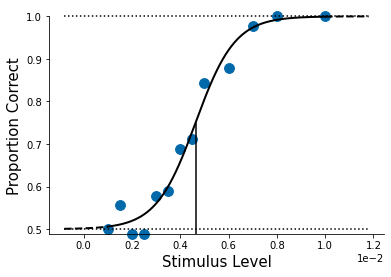

In [ ]:
ps.psigniplot.plotPsych(result)

The fitting result is a dictionary, which contains all information obtained from fitting your data. Let's check the keys of the dictionary 'result'

In [ ]:
result.keys()

dict_keys(['X1D', 'marginals', 'marginalsX', 'marginalsW', 'Posterior', 'logPmax', 'weight', 'integral', 'Fit', 'options', 'data', 'conf_Intervals', 'timestamp'])

The basic results we need are 'Fit', 'conf_Intervals'. 

result['Fit'] return 5 values: 1 - threshold $\alpha$, 2 - width between 5% and 95% percentile, 3 - $\lambda$, 4 - $\gamma$, 5 - $\eta$  



In [ ]:
result['Fit'] # Threshold, width between 95% and 5% percentile., lambda, gamma, eta (near 0 indicates binomiall distrubtion of the responses)

array([4.63280083e-03, 4.82349639e-03, 4.04994822e-07, 5.00000000e-01,
       1.77249263e-05])

The package also provide other visualizations, such as the marginal posterior density for a single parameter (`plotMarginal`), 2D posetrior marginal (`plot2D`), priors (`plotPrior`). 

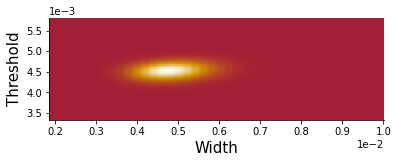

In [ ]:
ps.psigniplot.plot2D(result, 0, 1)

In [ ]:
ps.getThreshold(result, 0.75)[0]

/usr/local/lib/python3.7/dist-packages/psignifit/psignifit.py:717: UserWarning: The CIs computed by this method are only upper bounds. For more accurate inference change threshPC in the options.
  warnings.warn('The CIs computed by this method are only upper bounds. For more accurate inference change threshPC in the options.')


0.004632802153089353

# A case study: Temporal bisection

Recall in the lecture on 'logistic regression', we have used this example. 


**Paper**: 
Zhu, X., Baykan, C., Müller, H. J., & Shi, Z. (2021). Temporal bisection is influenced by ensemble statistics of the stimulus set. Attention, Perception & Psychophysics, 83(3), 1201–1214. https://doi.org/10.3758/s13414-020-02202-z

In this study we compare how ensemble statistics influence temporal bisection. We estimated the point of subjective equality (PSE) for each condition and use this PSE to judge if there are any significant changes in duration perception. 

The results from Experiment 2 looks like this:

![](https://media.springernature.com/full/springer-static/image/art%3A10.3758%2Fs13414-020-02202-z/MediaObjects/13414_2020_2202_Fig3_HTML.png?as=webp) 


The raw data are available in my github [here](https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/data/AllData_exp2.csv). 

In [25]:
# first - load data
bisection = pd.read_csv('https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/data/AllData_exp2.csv')
bisection.head()
# Here the relevant columns are:
# curDur - the probe duration
# RP - Response
# cond - 1 or 2 Positive Skewed vs. Negative Skewed distribution
# NSub - subject ID

,Unnamed: 0,X,moda,durNo,cond,curDur,RP,NSub,NT,valid,NB
0,1,1,1,11,1,0.8,0,1,1,0,0
1,2,2,1,14,1,0.8,1,1,2,0,0
2,3,3,1,21,1,0.6,0,1,3,0,0
3,4,4,1,17,1,0.6,0,1,4,0,0
4,5,5,1,23,1,0.4,0,1,5,0,0


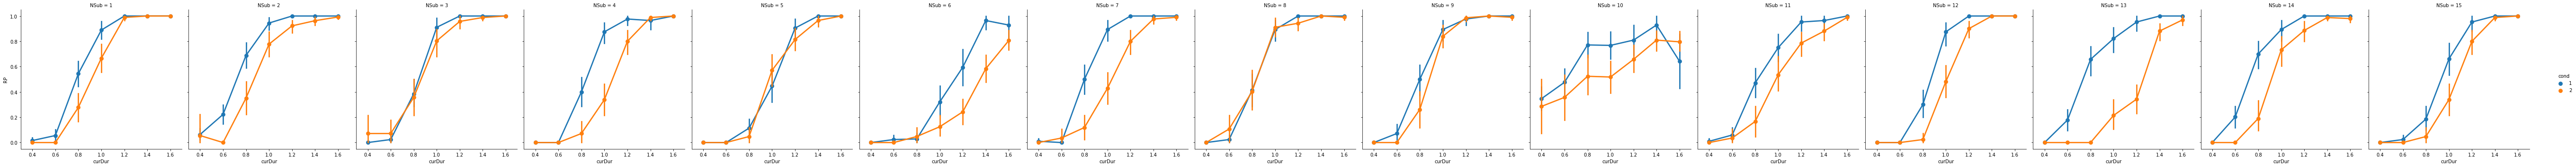

In [ ]:
# quickly visualize the individual data
sns.catplot(data = bisection, kind = 'point', 
            x = 'curDur', y = 'RP', hue = 'cond', col = 'NSub')

In the lecture of 'logistic regression', we use the package `pingouin` and `statsmodels` to fit the logistic functions. Here we now use the `psignifit` package. 

__Note:__ the input data for the `psignifit` is the summary table with three columns: Intensity, correct responses, total repetitions. 

So we need to prepare those summary data first. 

In [26]:
mresp = bisection.groupby(['NSub', 'cond', 'curDur']).agg({'RP':'sum', 'NB':'count'}).reset_index()
mresp.columns = ['subj','condition', 'duration', 'correct','total']
mresp.head()

,subj,condition,duration,correct,total
0,1,1,0.4,2,126
1,1,1,0.6,6,108
2,1,1,0.8,49,90
3,1,1,1.0,64,72
4,1,1,1.2,54,54


In [27]:
# 3. we want to estimate individual conditions for individual participant, 
# so we first get out unique subjects and unique condition. 
Subjects = mresp.subj.unique()
nsub = len(Subjects)
Conditions = mresp.condition.unique()

#prepare fitting options
options = dict(); # initialization
options['sigmoidName'] = 'logistic' # curves could be 'norm', 'logn', 'weibull', 'logistic', ...
options['expType'] = 'equalAsymptote' #this sets the guessing rate to .5 (fixed), fits the rest of the parameters
                            

#prepare a variable to store thresholds 
thresholds = pd.DataFrame(np.zeros((nsub,2)),index = Subjects, columns = Conditions)
thresholds.head()


,1,2
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0


In [ ]:
# now we estimate individual thresholds

for sub in Subjects:
  for cond in Conditions:
    curDat = mresp.query(f"subj == '{sub}' & condition == {cond}")
    res = ps.psignifit(curDat[['duration','correct','total']].to_numpy(), options)
    thresholds.loc[sub, cond] = res['Fit'][0] #threshold 
print(thresholds)

(array([], dtype=int64),)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
           1         2
1   0.798999  0.913539
2   0.715354  0.881559
3   0.835041  0.853979
4   0.844653  1.060341
5   1.007413  1.018105
6   1.124481  1.357518
7   0.818838  1.030637
8   0.832870  0.822920
9   0.810928  0.880381
10  0.575264  0.

__Note:__ The above logistic analysis  assumes the response curve is logistic curve is symmetrical. That is, the logistic function has the same guess rate $\gamma$ or lapse rate $\lambda$. 

Let's have a pair-wise t-test on the result. 

In [28]:
from scipy import stats
stats.ttest_rel(thresholds[1],thresholds[2])

Ttest_relResult(statistic=nan, pvalue=nan)

Let's visualize a pooled psychometric function. 

In [29]:
pooled = bisection.groupby(['cond', 'curDur']).agg({'RP':'sum', 'NB':'count'}).reset_index()
pooled.columns = ['condition', 'duration', 'correct','total']
pooled.head()

,condition,duration,correct,total
0,1,0.4,46,1526
1,1,0.6,121,1308
2,1,0.8,491,1090
3,1,1.0,692,872
4,1,1.2,617,654


Now let's visualize the group averaged psychometric functions. 

In [30]:
df = pooled.query('condition == 1')[['duration', 'correct','total']]
af = pooled.query('condition == 2')[['duration', 'correct','total']]
res_df = ps.psignifit(df, options)
res_af = ps.psignifit(af, options)

(array([], dtype=int64),)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([], dtype=int64),)


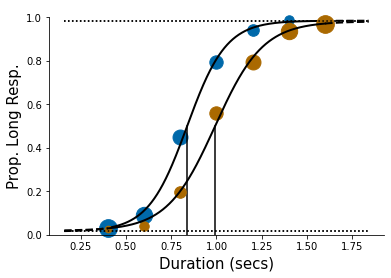

In [55]:
ax = plt.gca()
a1 = ps.psigniplot.plotPsych(res_df, axisHandle = ax, showImediate = False)
ps.psigniplot.plotPsych(res_af, axisHandle = ax,
                        dataColor = [170./255, 105./255,0],
                        xLabel = "Duration (secs)",
                        yLabel = "Prop. Long Resp.")


Compare to the plot shown in the paper (use R code):

![](https://media.springernature.com/full/springer-static/image/art%3A10.3758%2Fs13414-020-02202-z/MediaObjects/13414_2020_2202_Fig3_HTML.png?as=webp) 